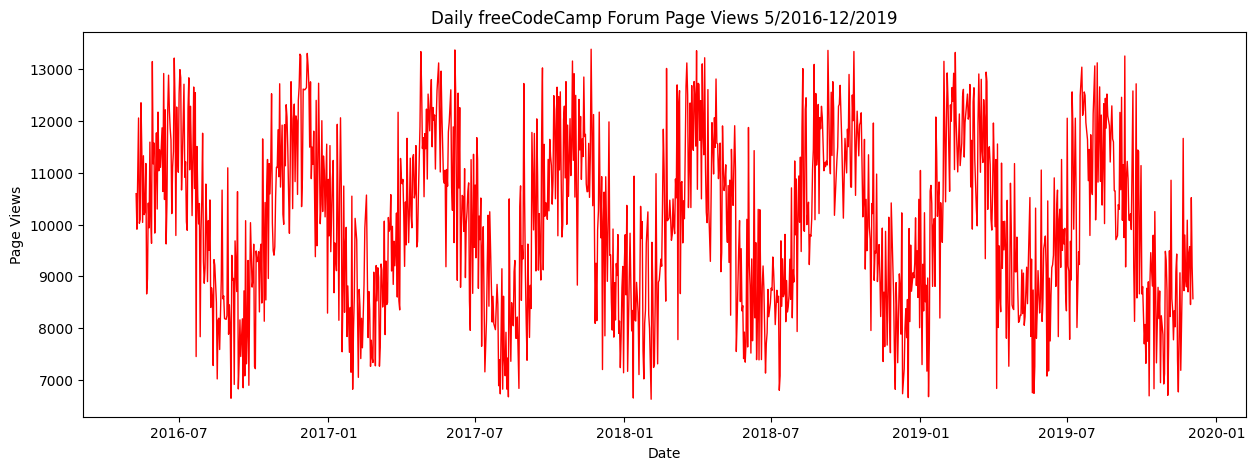

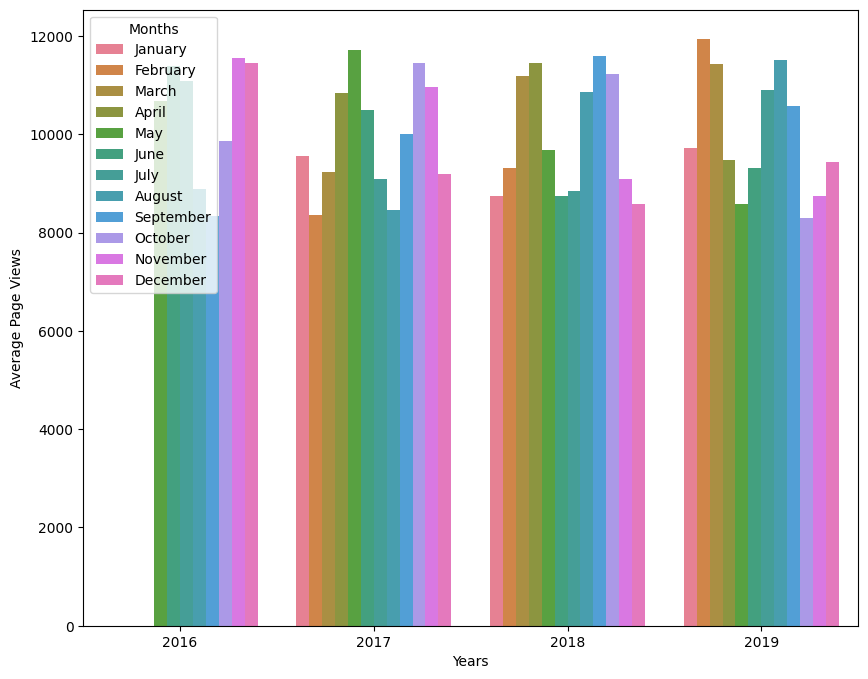

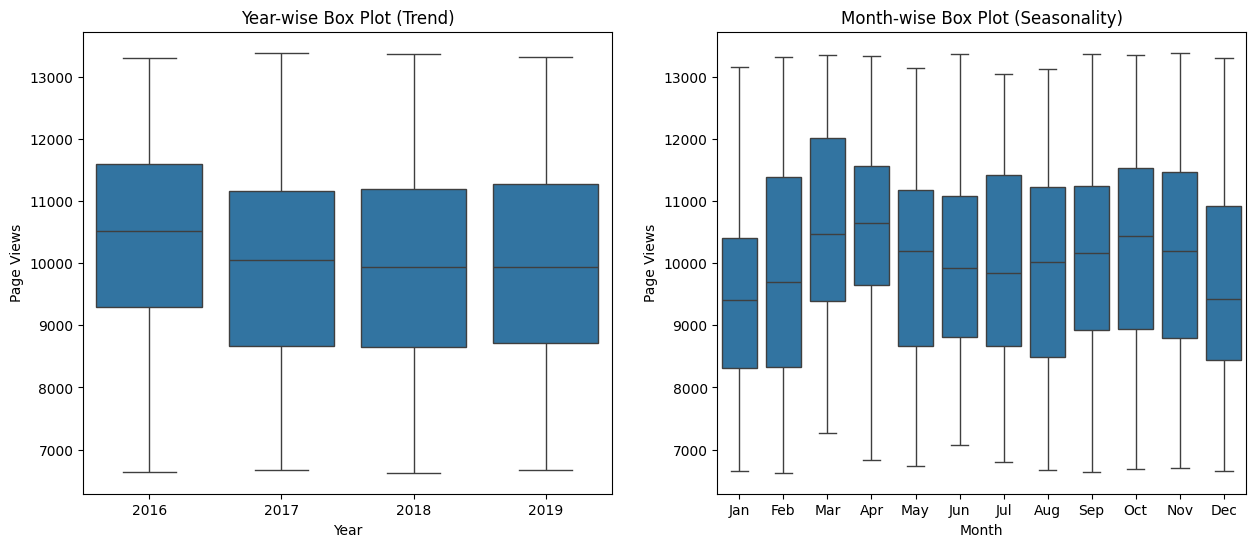

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv(r"C:\Users\ayush\OneDrive\Desktop\fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
df = df[
    (df["value"] >= df["value"].quantile(0.025)) &
    (df["value"] <= df["value"].quantile(0.975))
]

def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df["value"], color="red", linewidth=1)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    fig.savefig("line_plot.png")
    return fig

def draw_bar_plot():
    df_bar = df.copy()
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month_name()
    df_grouped = df_bar.groupby(["year", "month"])["value"].mean().reset_index()

    month_order = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]
    df_grouped["month"] = pd.Categorical(df_grouped["month"], categories=month_order, ordered=True)
    df_grouped = df_grouped.sort_values(["year", "month"])

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.barplot(data=df_grouped, x="year", y="value", hue="month", ax=ax)
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.legend(title="Months")
    fig.savefig("bar_plot.png")
    return fig

def draw_box_plot():
    df_box = df.copy().reset_index()
    df_box["year"] = df_box["date"].dt.year
    df_box["month"] = df_box["date"].dt.strftime("%b")
    df_box["month_num"] = df_box["date"].dt.month
    df_box = df_box.sort_values("month_num")

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x="year", y="value", data=df_box, ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    sns.boxplot(x="month", y="value", data=df_box, ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    fig.savefig("box_plot.png")
    return fig

if __name__ == "__main__":
    draw_line_plot()
    draw_bar_plot()
    draw_box_plot()
